In [70]:
#Appel du notebook contenant les packages
%run ./head.ipynb
#Appel du notebook contenant des fonctions définies
%run ./function.ipynb
#Racine principale de récupération des données
glob_path = "https://data.enseignementsup-recherche.gouv.fr/api/records/1.0/search/?dataset="

Tout est ok ! 
Tout est ok ! 


### 1.3 INSERTION PROFESSIONNEL



https://data.enseignementsup-recherche.gouv.fr/api/records/1.0/search/?dataset=fr-esr-insertion_professionnelle-lp&q=&rows=1500&facet=annee&facet=diplome&facet=numero_de_l_etablissement&facet=etablissement&facet=academie&facet=domaine&facet=code_de_la_discipline&facet=discipline&facet=situation&facet=cle_etab&facet=cle_disc&facet=id_paysage&refine.annee=2018

In [115]:
insertion = glob_path + "fr-esr-insertion_professionnelle-"
niveau = ["lp", "master"]
complement = "&q=&rows=1500&sort=-annee&facet=annee&facet=diplome&facet=numero_de_l_etablissement&facet=etablissement&facet=academie&facet=domaine&facet=code_de_la_discipline&facet=discipline&facet=situation&facet=cle_etab&facet=cle_disc&facet=id_paysage&refine.annee=2018"

In [116]:
#Récupération selon le niveau
data_insertion = [requests.get(insertion + niveau[x] + complement) for x in range(2)]

In [117]:
#Conversion de json à pd.Dataframe
data_insertion = [pd.json_normalize(x.json()['records'][:]) for x in data_insertion ]

In [118]:
###Les données selon le niveau sont identifiées par la varibale datsetid

In [119]:
data_insertion[0].shape

(1432, 36)

In [120]:
data_insertion[1].shape

(1500, 36)

In [121]:
glob_data_insertion = pd.concat(data_insertion)
glob_data_insertion.columns = [c.replace('fields.', '') for c in list(glob_data_insertion.columns) ]

<AxesSubplot:xlabel='count', ylabel='remarque'>

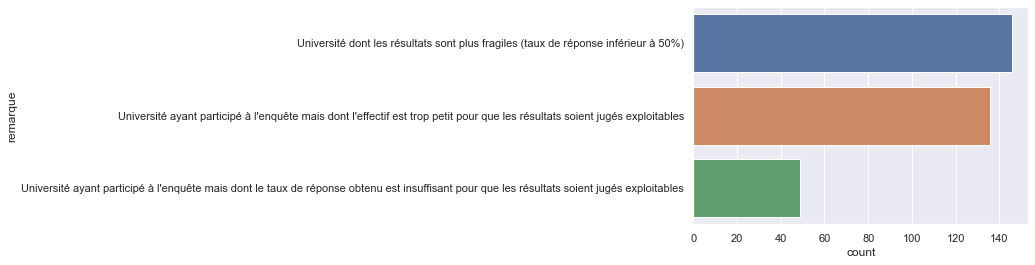

In [122]:
sns.countplot(data=glob_data_insertion, y='remarque', order=glob_data_insertion.remarque.value_counts().index )

In [123]:
#On garde les établissements dont les données sont jugés pertinentes
glob_data_insertion = glob_data_insertion[glob_data_insertion.remarque.isna()]

In [124]:
#La variable remarque nous permet de décider quels sont les établissement intéressants à inclure dans l'analyse au regard de la représentativité

In [184]:
df_insertion = glob_data_insertion.copy()

In [178]:
df_insertion = df_insertion.drop(["datasetid", "recordid", "record_timestamp", "remarque", 'etablissementactuel'], axis = 1)

In [256]:
df_insertion

,datasetid,recordid,record_timestamp,discipline,salaire_brut_annuel_estime,salaire_net_mensuel_regional_3eme_quartile,salaire_net_mensuel_median_regional,cle_disc,taux_de_reponse,etablissementactuel,emplois_cadre_ou_professions_intermediaires,taux_dinsertion,emplois_exterieurs_a_la_region_de_luniversite,emplois_stables,diplome,salaire_net_median_des_emplois_a_temps_plein,poids_de_la_discipline,taux_de_chomage_regional,code_du_domaine,emplois_a_temps_plein,code_de_la_discipline,de_diplomes_boursiers,academie,numero_de_l_etablissement,domaine,nombre_de_reponses,femmes,salaire_net_mensuel_regional_1er_quartile,cle_etab,emplois_cadre,situation,annee,id_paysage,etablissement,code_de_l_academie,remarque
0,fr-esr-insertion_professionnelle-lp,da765b6a4d45dd6886a8baeba37997c653f36b41,2021-12-15T22:16:37.978000+00:00,"Ensemble formations juridiques, économiques et...",27000,2240,1860,disc01_18,78,Université Côte d'Azur (UCA),50,96,34,82,LICENCE PRO,1730,49,9,DEG,95,disc01,14,Nice,0060931E,"Droit, économie et gestion",91,60,1410,Nice - Sophia-Antipolis_18,7,18 mois après le diplôme,2018,7CYWd,Nice - Sophia-Antipolis,A23,NaN
1,fr-esr-insertion_professionnelle-lp,fd7af98d5194b196646e8a56d246429bfb6d3fd3,2021-12-15T22:16:37.978000+00:00,Économie,ns,2240,1860,disc03_18,81,Université Côte d'Azur (UCA),ns,90,ns,ns,LICENCE PRO,ns,16,9,DEG,ns,disc03,14,Nice,0060931E,"Droit, économie et gestion",29,ns,1410,Nice - Sophia-Antipolis_18,ns,18 mois après le diplôme,2018,7CYWd,Nice - Sophia-Antipolis,A23,NaN
2,fr-esr-insertion_professionnelle-lp,8e0659da8279539be416739ff8bf43a896b75cc4,2021-12-15T22:16:37.978000+00:00,Gestion,27900,2240,1860,disc04_18,75,Université Côte d'Azur (UCA),56,100,24,90,LICENCE PRO,1790,27,9,DEG,92,disc04,14,Nice,0060931E,"Droit, économie et gestion",49,51,1410,Nice - Sophia-Antipolis_18,6,18 mois après le diplôme,2018,7CYWd,Nice - Sophia-Antipolis,A23,NaN
3,fr-esr-insertion_professionnelle-lp,01e6b76cfc0190483488a5e2b810015a62d142d4,2021-12-15T22:16:37.978000+00:00,Gestion,28200,2240,1860,disc04_30,75,Université Côte d'Azur (UCA),54,98,24,94,LICENCE PRO,1810,27,9,DEG,96,disc04,14,Nice,0060931E,"Droit, économie et gestion",49,51,1410,Nice - Sophia-Antipolis_30,6,30 mois après le diplôme,2018,7CYWd,Nice - Sophia-Antipolis,A23,NaN
4,fr-esr-insertion_professionnelle-lp,8e7f79b211b5071c5c9faf34a25cc5e4d51b4bd7,2021-12-15T22:16:37.978000+00:00,"Lettres, langues, arts",ns,2240,1860,disc06_18,63,Université Côte d'Azur (UCA),ns,ns,ns,ns,LICENCE PRO,ns,1,9,LLA,ns,disc06,14,Nice,0060931E,"Lettres, langues, arts",3,ns,1410,Nice - Sophia-Antipolis_18,ns,18 mois après le diplôme,2018,7CYWd,Nice - Sophia-Antipolis,A23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,fr-esr-insertion_professionnelle-master,221e932fd109abf487628201d02e94fbc2ce2845,2021-12-15T22:16:17.552000+00:00,Sciences fondamentales,ns,2700,2170,disc14_30,50,NaN,ns,ns,ns,ns,MASTER LMD,ns,1,7.7,STS,ns,disc14,38,Créteil,0931827F,"Sciences, technologies et santé",2,ns,1650,Paris 8 - Vincennes Saint-Denis_30,ns,30 mois après le diplôme,2018,Uxr7Z,Paris 8 - Vincennes Saint-Denis,A24,NaN
1496,fr-esr-insertion_professionnelle-master,140105064e452e76197ab5c5ea2caaef45f6806f,2021-12-15T22:16:17.552000+00:00,Informatique,ns,2700,2170,disc16_18,61,NaN,ns,ns,ns,ns,MASTER LMD,ns,4,7.7,STS,ns,disc16,38,Créteil,0931827F,"Sciences, technologies et santé",11,ns,1650,Paris 8 - Vincennes Saint-Denis_18,ns,18 mois après le diplôme,2018,Uxr7Z,Paris 8 - Vincennes Saint-Denis,A24,NaN
1497,fr-esr-insertion_professionnelle-master,8e851c9f1943f44378e2e861c692db5b7b3d6b2b,2021-12-15T22:16:17.552000+00:00,"Ensemble formations juridiques, économiques et...",38500,2700,2170,disc01_30,74,CY Cergy Paris Université,94,92,12,83,MASTER LMD,2470,51,7.7,DEG,97,disc01,13,Versailles,0951793H,"Droit, économie et gestion",241,57,1650,Cergy-Pontoise_30,82,30 mois après le diplôme,2018,W6CUQ,Cergy-Pontoise,A2

In [179]:
#import ipynb.fs.full
#.fs.full.function import miss, visualisation

In [180]:
missings = miss(df_insertion)

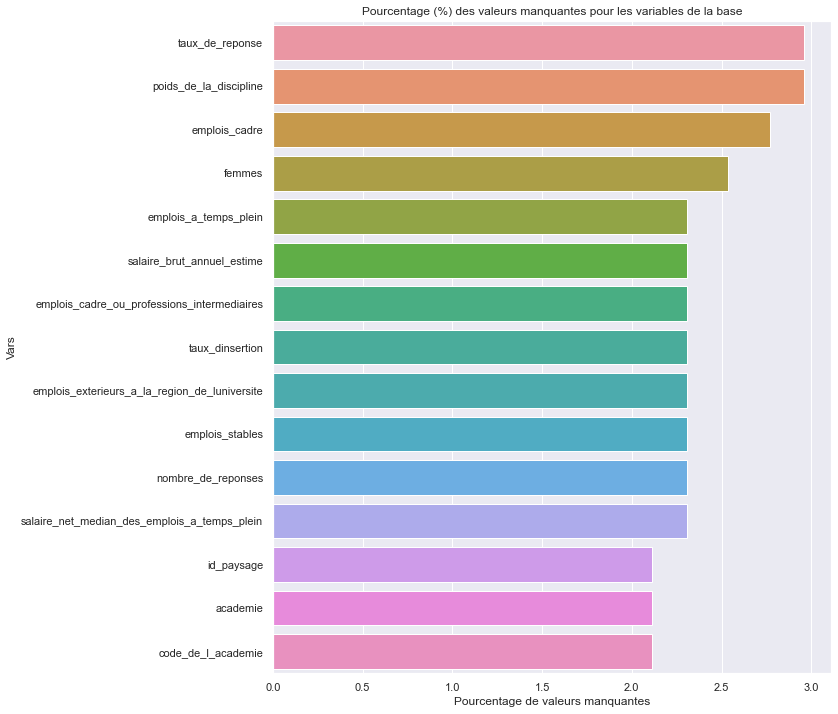

In [181]:
viz_na(missings,0)

In [187]:
df_insertion[['taux_de_reponse', 'nombre_de_reponses']].isna().sum()

taux_de_reponse       77
nombre_de_reponses    60
dtype: int64

<AxesSubplot:xlabel='count', ylabel='etablissementactuel'>

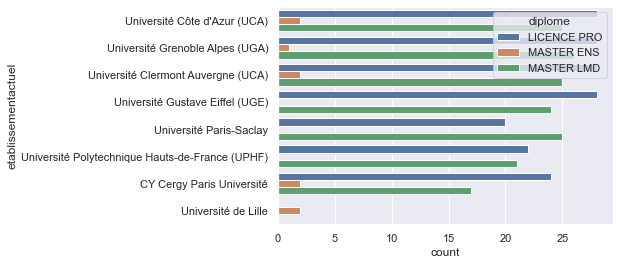

In [198]:
sns.countplot(data=df_insertion[~df_insertion['etablissementactuel'].isna()], y='etablissementactuel', order=df_insertion.etablissementactuel.value_counts().index, hue = 'diplome')

# ---------------------------------------------KHARIRATOU---------------------------------------------

In [221]:
df = df_insertion.copy()

In [222]:
df['na']=np.nan

In [223]:
df['na']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1495   NaN
1496   NaN
1497   NaN
1498   NaN
1499   NaN
Name: na, Length: 2601, dtype: float64

In [240]:
df[['taux_dinsertion', 'nombre_de_reponses', 'nb_insertion']]

,taux_dinsertion,nombre_de_reponses,nb_insertion
0,96.0,91.0,87.36
1,90.0,29.0,26.10
2,100.0,49.0,49.00
3,98.0,49.0,48.02
4,NaN,3.0,NaN
...,...,...,...
1495,NaN,2.0,NaN
1496,NaN,11.0,NaN
1497,92.0,241.0,221.72
1498,88.0,85.0,74.80


In [235]:
df['taux_dinsertion'].replace({'ns': np.nan}, inplace = True)

In [237]:
df[df['taux_dinsertion'] == 'nd'] = np.nan

In [238]:
df[df['taux_dinsertion'] == 'nd']

,datasetid,recordid,record_timestamp,discipline,salaire_brut_annuel_estime,salaire_net_mensuel_regional_3eme_quartile,salaire_net_mensuel_median_regional,cle_disc,taux_de_reponse,etablissementactuel,emplois_cadre_ou_professions_intermediaires,taux_dinsertion,emplois_exterieurs_a_la_region_de_luniversite,emplois_stables,diplome,salaire_net_median_des_emplois_a_temps_plein,poids_de_la_discipline,taux_de_chomage_regional,code_du_domaine,emplois_a_temps_plein,code_de_la_discipline,de_diplomes_boursiers,academie,numero_de_l_etablissement,domaine,nombre_de_reponses,femmes,salaire_net_mensuel_regional_1er_quartile,cle_etab,emplois_cadre,situation,annee,id_paysage,etablissement,code_de_l_academie,remarque,na,nb_insertion


In [250]:
#création variable nombre de personnes insérées
df["taux_dinsertion"] = df["taux_dinsertion"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
    
df['nb_insertion']= df["taux_dinsertion"]*df["nombre_de_reponses"]/100

# Répartition des insérés par discipline et par établissement

<AxesSubplot:xlabel='nb_insertion', ylabel='discipline'>

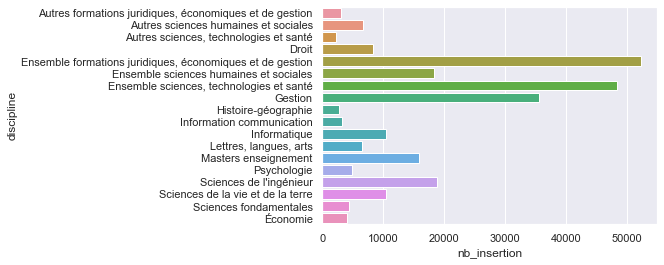

In [255]:
# Répartition du nombre d'insérés par discipline
df_g =df.groupby(['discipline']).sum('nb_insertion')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_insertion", y="discipline", data=df_g)

In [247]:
df_g

,discipline,taux_dinsertion,nombre_de_reponses,na,nb_insertion
0,"Autres formations juridiques, économiques et d...",1729.0,4487.0,0.0,3111.50
1,Autres sciences humaines et sociales,4594.0,9345.0,0.0,6734.92
2,"Autres sciences, technologies et santé",3588.0,3221.0,0.0,2233.80
3,Droit,5820.0,9912.0,0.0,8356.24
4,"Ensemble formations juridiques, économiques et...",16060.0,57306.0,0.0,52354.86
5,Ensemble sciences humaines et sociales,9025.0,22526.0,0.0,18284.83
6,"Ensemble sciences, technologies et santé",15765.0,52676.0,0.0,48385.14
7,Gestion,15522.0,39119.0,0.0,35661.81
8,Histoire-géographie,1846.0,4133.0,0.0,2713.77
9,Information communication,4152.0,5079.0,0.0,3291.44


<AxesSubplot:xlabel='nb_insertion', ylabel='domaine'>

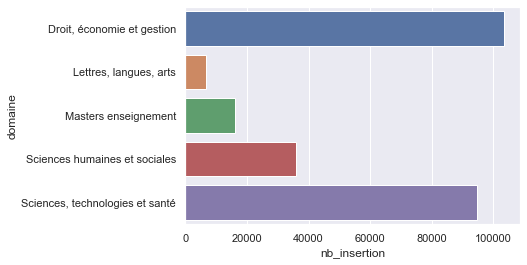

In [245]:
df_g =df.groupby(['domaine']).sum('nb_insertion')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_insertion", y="domaine", data=df_g)

In [231]:
# Répartion du nombre des insérés par établissement
df_g =df.groupby(['cle_etab']).sum('nb_insertion')
df_g.reset_index(inplace = True)
df_g

,cle_etab,taux_dinsertion,nombre_de_reponses,na,nb_insertion
0,Aix-Marseille_18,1732.0,2662.0,0.0,2270.64
1,Aix-Marseille_30,2034.0,3831.0,0.0,3337.10
2,Amiens - Picardie Jules-Verne_18,1666.0,1886.0,0.0,1525.22
3,Amiens - Picardie Jules-Verne_30,1635.0,1827.0,0.0,1522.09
4,Angers_18,1268.0,1665.0,0.0,1394.72
...,...,...,...,...,...
121,Université de Paris_30,1470.0,1649.0,0.0,1372.33
122,Versailles Saint-Quentin-en-Yvelines_18,728.0,842.0,0.0,607.73
123,Versailles Saint-Quentin-en-Yvelines_30,704.0,820.0,0.0,572.88
124,Évry-Val d'Essonne_18,371.0,324.0,0.0,243.94


In [ ]:
#import pandas as pd
#pd.crosstab(df.cle_etab, df.nb_insertion).apply(lambda r: r/len(df), axis=1)

#freq = df.groupby(['cle_etab']).sum('nb_insertion').sort_values
#print(freq)

# Caractéristiques des sortants et caractéristiques des sortants insérés

## Par sexe

In [215]:
#création variable nombre de femmes
df[df['femmes'] == 'ns'] = np.nan
df[df['femmes'] == 'nd'] = np.nan

df["femmes"] = df["femmes"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_femmes']= df["femmes"]*df["nombre_de_reponses"]

<AxesSubplot:xlabel='nb_femmes', ylabel='discipline'>

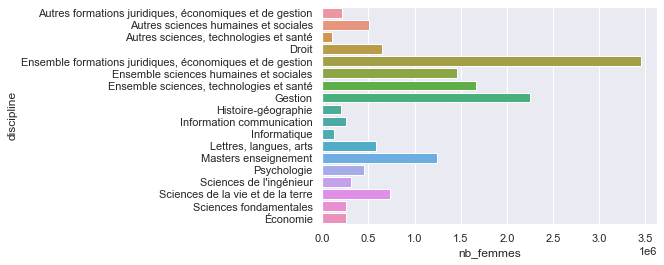

In [216]:
# Répartition du nombre de femmes diplomées par discipline
df_g =df.groupby(['discipline']).sum('nb_femmes')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_femmes", y="discipline", data=df_g)

<AxesSubplot:xlabel='nb_femmes', ylabel='domaine'>

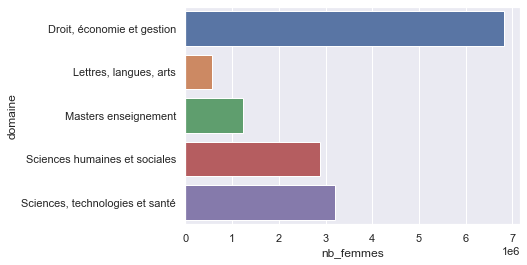

In [217]:
df_g =df.groupby(['domaine']).sum('nb_femmes')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_femmes", y="domaine", data=df_g)

In [218]:
# Représentation Proportion des femmes insérées selon l'établissement???
df['nb_femmes_inserees']= df["nb_femmes"]/df["nb_insertion"]
df_g1 =df.groupby(['cle_etab']).sum('nb_femmes_inserees')
#df_g1.reset_index(inplace = True)
df_g1

,taux_dinsertion,nombre_de_reponses,femmes,na,nb_insertion,nb_femmes,nb_femmes_inserees
cle_etab,,,,,,,
Aix-Marseille_18,1732.0,2587.0,1006.0,0.0,227064.0,138389.0,11.778862
Aix-Marseille_30,2034.0,3756.0,1165.0,0.0,333710.0,201404.0,13.296297
Amiens - Picardie Jules-Verne_18,1666.0,1716.0,1000.0,0.0,152522.0,90916.0,11.577243
Amiens - Picardie Jules-Verne_30,1635.0,1657.0,891.0,0.0,152209.0,84645.0,9.913666
Angers_18,1268.0,1543.0,783.0,0.0,139472.0,90285.0,8.668913
...,...,...,...,...,...,...,...
Université de Paris_30,1470.0,1502.0,995.0,0.0,137233.0,100305.0,10.864971
Versailles Saint-Quentin-en-Yvelines_18,728.0,673.0,512.0,0.0,60773.0,45316.0,5.640502
Versailles Saint-Quentin-en-Yvelines_30,704.0,652.0,517.0,0.0,57288.0,43844.0,5.888665


In [ ]:
# Répartition proportion de femmes insérées par discipline
df_g2 =df.groupby(['discipline']).sum('nb_femmes_inserees')
df_g2.reset_index(inplace = True)
sns.barplot(x="nb_femmes_inserees", y="discipline", data=df_g2)

## Par nombre de boursiers

In [ ]:
#création variable nombre de diplomés boursiers
df[df['de_diplomes_boursiers'] == 'ns'] = np.nan
df[df['de_diplomes_boursiers'] == 'nd'] = np.nan

df["de_diplomes_boursiers"] = df["de_diplomes_boursiers"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_de_diplomes_boursiers']= df["de_diplomes_boursiers"]*df["nombre_de_reponses"]

In [ ]:
# nb de diplomés boursiers /etab /discipline
df_g =df.groupby(['discipline']).sum('nb_de_diplomes_boursiers')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_de_diplomes_boursiers", y="discipline", data=df_g)

In [ ]:
df_g =df.groupby(['domaine']).sum('nb_de_diplomes_boursiers')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_de_diplomes_boursiers", y="domaine", data=df_g)

In [ ]:
# Représentation Proportion de boursiers insérés selon l'établissement???
df['nb_boursiers_inseres']= df["nb_de_diplomes_boursiers"]/df["nb_insertion"]
df_g1 =df.groupby(['cle_etab']).sum('nb_boursiers_inseres')
#df_g1.reset_index(inplace = True)
df_g1

In [ ]:
# Répartition proportion de boursiers insérés par discipline
df_g2 =df.groupby(['discipline']).sum('nb_boursiers_inseres')
df_g2.reset_index(inplace = True)
sns.barplot(x="nb_boursiers_inseres", y="discipline", data=df_g2)

## Par nombre d'emplois stables

In [ ]:
#création variable nombre d'emplois stables
df[df['emplois_stables'] == 'ns'] = np.nan
df[df['emplois_stables'] == 'nd'] = np.nan

df["emplois_stables"] = df["emplois_stables"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_emplois_stables']= df["emplois_stables"]*df["nombre_de_reponses"]

In [ ]:
# nb de emplois stables /etab /discipline
df_g =df.groupby(['discipline']).sum('nb_emplois_stables')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_emplois_stables", y="discipline", data=df_g)

In [ ]:
df_g =df.groupby(['domaine']).sum('nb_emplois_stables')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_emplois_stables", y="domaine", data=df_g)

In [ ]:
# Représentation Proportion de emplois stables des insérés selon l'établissement???
df['nb_emplois_stables_inseres']= df["nb_emplois_stables"]/df["nb_insertion"]
df_g1 =df.groupby(['cle_etab']).sum('nb_emplois_stables_inseres')
#df_g1.reset_index(inplace = True)
df_g1

In [ ]:
# Répartition proportion de emplois stables des insérés par discipline
df_g2 =df.groupby(['discipline']).sum('nb_emplois_stables_inseres')
df_g2.reset_index(inplace = True)
sns.barplot(x="nb_emplois_stables_inseres", y="discipline", data=df_g2)

## Selon le salaire

In [ ]:
#création variable salaires bruts annuels estimés
df[df['salaire_brut_annuel_estime'] == 'ns'] = np.nan
df[df['salaire_brut_annuel_estime'] == 'nd'] = np.nan

df["salaire_brut_annuel_estime"] = df["salaire_brut_annuel_estime"].astype('float64')

In [ ]:
# Répartition des salaires bruts annuels /discipline
df_g =df.groupby(['discipline']).sum('salaire_brut_annuel_estime')
df_g.reset_index(inplace = True)
sns.barplot(x="salaire_brut_annuel_estime", y="discipline", data=df_g)

In [ ]:
df_g =df.groupby(['domaine']).sum('salaire_brut_annuel_estime')
df_g.reset_index(inplace = True)
sns.barplot(x="salaire_brut_annuel_estime", y="domaine", data=df_g)

In [ ]:
# Représentation de salaires bruts annuels selon l'établissement???
df_g1 =df.groupby(['cle_etab']).sum('salaire_brut_annuel_estime')
#df_g1.reset_index(inplace = True)
df_g1